# Red Wine Data Analysis

In [1]:
import csv
with open('winequality-red.csv', 'r') as f:
    wine = list(csv.reader(f, delimiter=';'))

## 1. Data Exploration

In [2]:
wine_features = wine[0][:11]
print('Input Attributes:\n\n',wine_features)

Input Attributes:

 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [3]:
import numpy as np
wine_records = np.array(wine[1:], dtype=np.float)
wine_data = wine_records[:,:11]
print(wine_data.shape)
wine_target = wine_records[:,11:]
print(wine_target.shape)

(1599, 11)
(1599, 1)


In [4]:
# check for missing values is any
print(np.isnan(wine_data).any())

False


### 1.1 Statistics of the Dataset

In [5]:
# check for anomalies in the attributes
statistics = np.zeros((11,4))
for i in range(11):
    statistics[i][0] = np.amin(wine_data[:,i])
    statistics[i][1] = np.amax(wine_data[:,i])
    statistics[i][2] = np.median(wine_data[:,i])
    statistics[i][3] = np.std(wine_data[:,i])
import pandas as pd
print('Structure of Dataset:\n\n',pd.DataFrame(statistics,index=wine_features,columns=['Min','Max','Median','SD']))

Structure of Dataset:

                           Min        Max    Median         SD
fixed acidity         4.60000   15.90000   7.90000   1.740552
volatile acidity      0.12000    1.58000   0.52000   0.179004
citric acid           0.00000    1.00000   0.26000   0.194740
residual sugar        0.90000   15.50000   2.20000   1.409487
chlorides             0.01200    0.61100   0.07900   0.047051
free sulfur dioxide   1.00000   72.00000  14.00000  10.456886
total sulfur dioxide  6.00000  289.00000  38.00000  32.885037
density               0.99007    1.00369   0.99675   0.001887
pH                    2.74000    4.01000   3.31000   0.154338
sulphates             0.33000    2.00000   0.62000   0.169454
alcohol               8.40000   14.90000  10.20000   1.065334


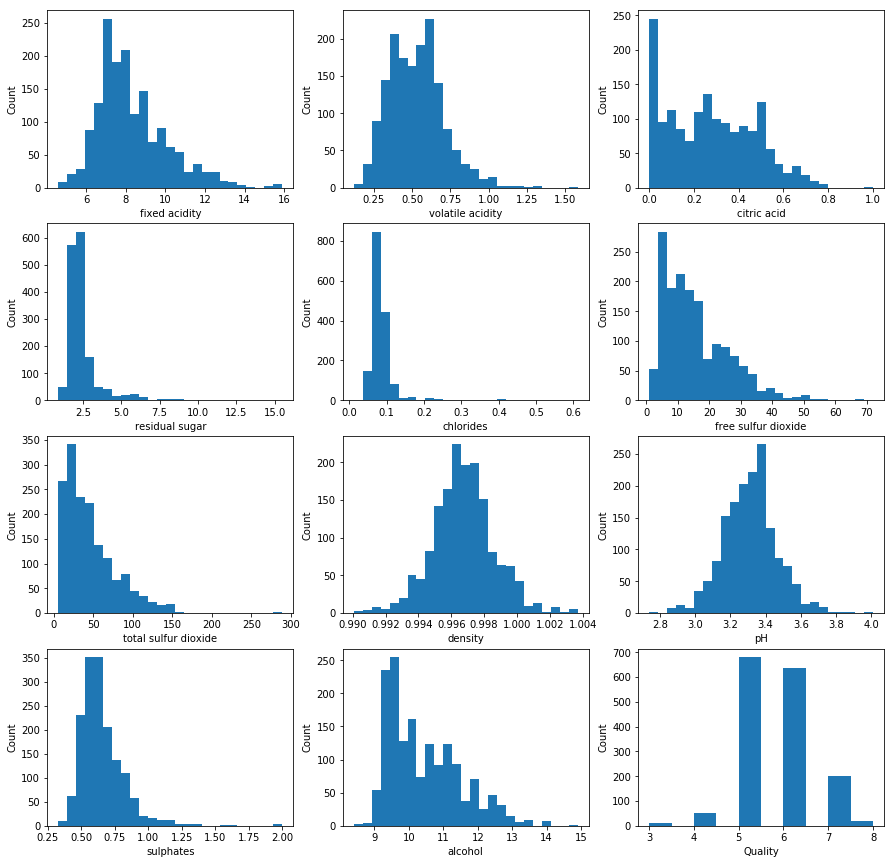

In [6]:
# histogram plot of each input attribute and the output-'Quality'
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(4, 3, figsize=(15, 15))
k = 0

for i in range(4):
    for j in range(3):
        if k<11:
            ax[i,j].hist(wine_data[:,k], bins=25)
            ax[i,j].set(xlabel=wine_features[k], ylabel="Count")
            k += 1
        else:
            ax[i,j].hist(wine_target)
            ax[i,j].set(xlabel="Quality", ylabel="Count")

### Observation from the data statistics and the plots shown above
- Density and pH are normally distributed
- fixed acidity, volatile acidity, free sulfur dioxide, total sulfur dioxide, sulphates and alcohol has got some outliers
- residual sugar and chloride has got extreme outliers

### 1.2 Relationship between each attribute and the output

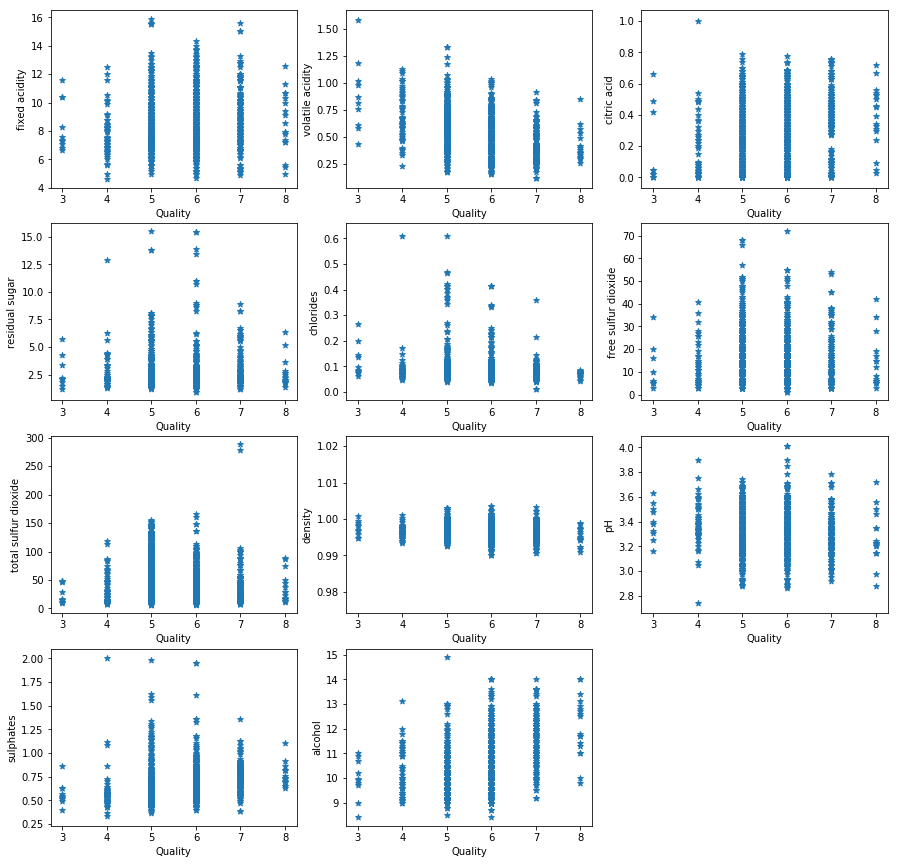

In [7]:
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
k = 0
for i in range(4):
    for j in range(3):
        if k<11:
            ax[i,j].scatter(wine_target,wine_data[:,k],marker='*')
            ax[i,j].set(xlabel="Quality", ylabel=wine_features[k])
        else:
            ax[i,j].set_visible(False)
        k += 1

### Observations-

- negative relaionship with volatile acidity
- strong positive correlation with alcohol, sulphates
- slight positive correlation with citric acid, free sulfur dioxide, fixed acidity
- very slight negative correlation with density, ph
- no significant relation with total sulfur dioxide, chlorides, residual sugar

### 1.3 Relationship between the atttributes

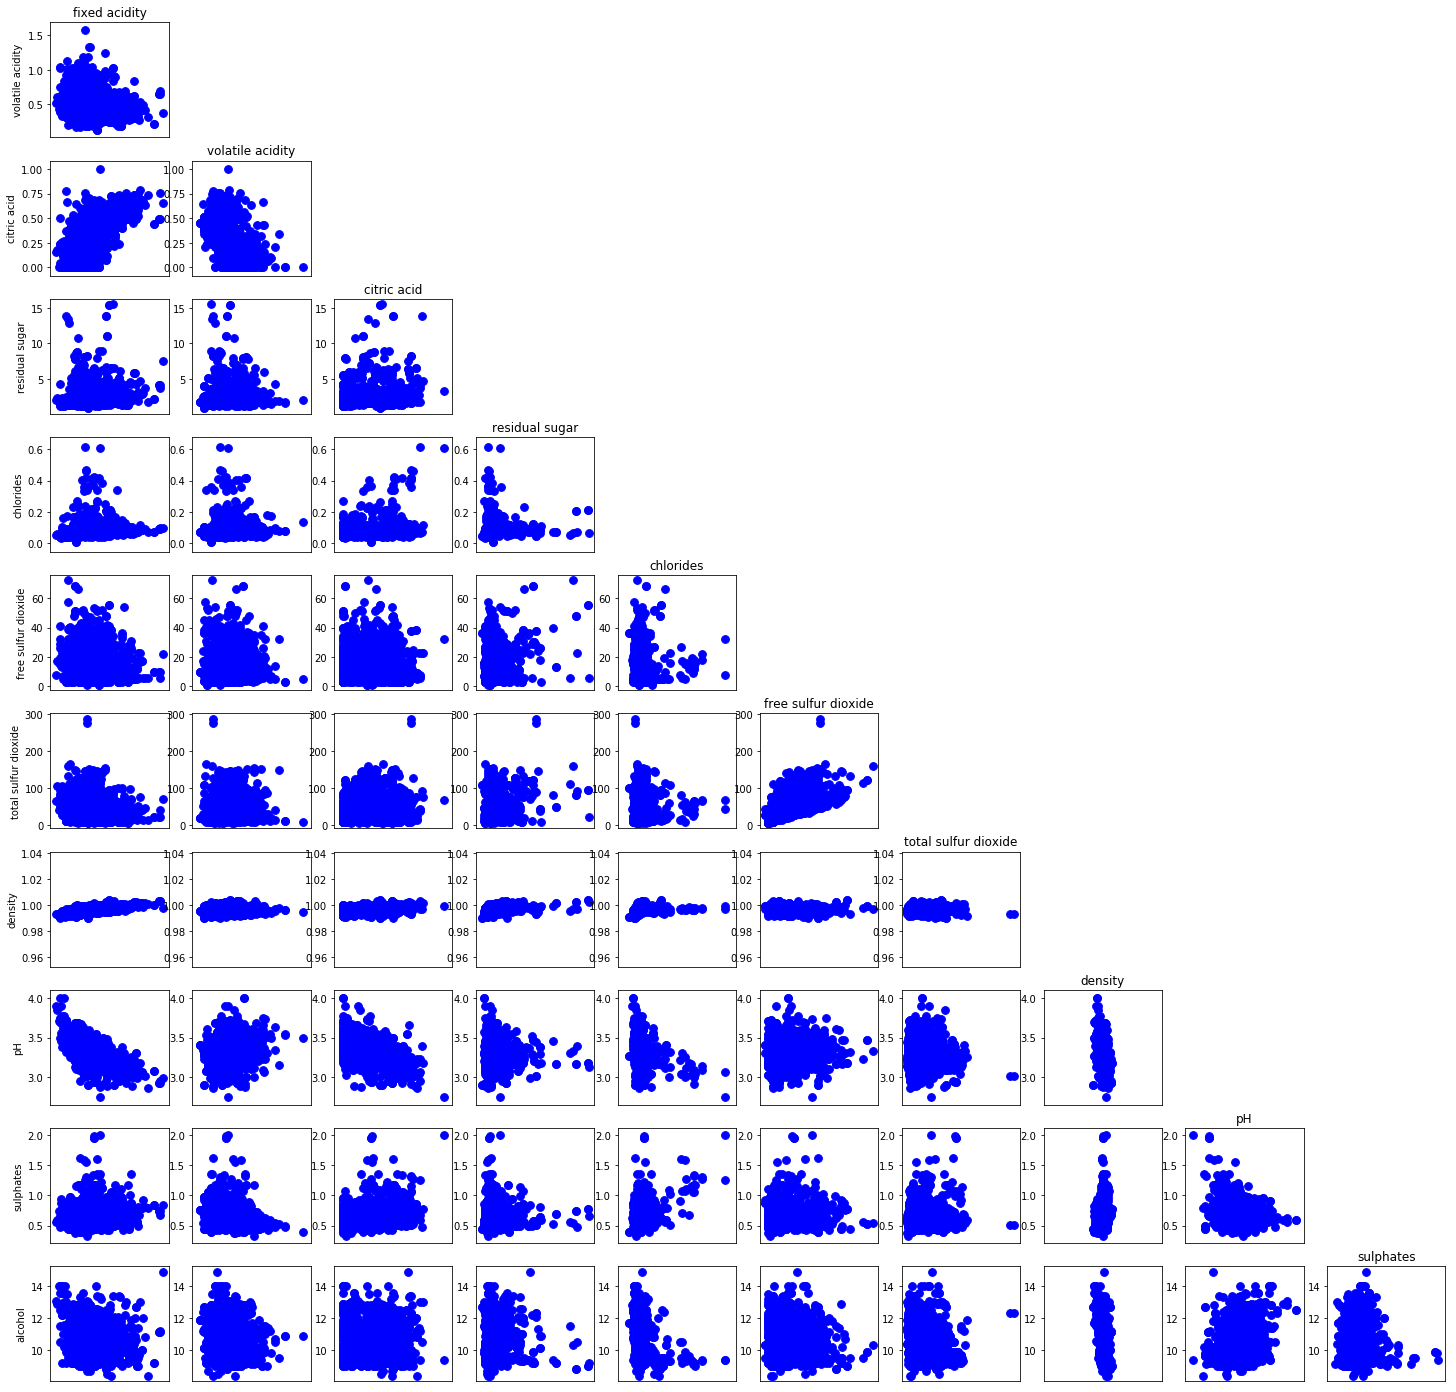

In [8]:
fig, ax = plt.subplots(10, 10, figsize=(25, 25))

for i in range(10):
    for j in range(10):
        ax[i,j].scatter(wine_data[:,j], wine_data[:,i+1], c='b', s=60)
        if j==i:
            ax[i,j].set_title(wine_features[j])
        if j==0:
            ax[i,j].set_ylabel(wine_features[i+1])
        ax[i,j].set_xticks(())
        if j > i:
            ax[i,j].set_visible(False)

### Observations-

- fixed acidity: +ve with citric acid, -ve with pH
- volatile acidity: slight -ve with sulphates
- citric acid: -ve with pH
- free sulfur dioxide: slight +ve with total sulfur dioxide

### 1.4 Correlation between the attributes and the output

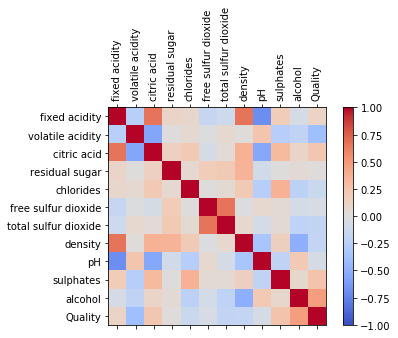

In [9]:
full_features = np.append(wine_features,'Quality')
#print(full_features)
data = pd.DataFrame(wine_records,columns=full_features)
corr = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns)
ax.set_yticklabels(data.columns)
plt.show()

### Observations-

- fixed acidity: +ve with citric acid and density, -ve with pH
- volatile acidity: -ve with citric acid and quality
- citric acid: +ve with fixed acidity, sulphates, density and quality -ve with volatile acidity and pH
- densiy: +ve with fixed acidity, residual sugar, and citric acid -ve with alcohol and pH
- pH: -ve with fixed acidity and citric acid
- sulphates: +ve with chlorides, citric acid and Quality
- alcohol: +ve with quality, -ve with density
- quality: +ve alcohol, sulphates and citric acid, -ve with volatile acidity

# 2. Data Exploitation

Fitting the SVM model on the original dataset

In [10]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np
X_train_orig, X_test_orig, y_train, y_test = train_test_split(wine_data, wine_target, random_state=0)
svm = SVC()
print('Cross-validation score: ',np.mean(cross_val_score(svm, X_train_orig, y_train)))
svm.fit(X_train_orig, y_train)
print('Training set score:     ',svm.score(X_train_orig, y_train))
print('Test set score          ',svm.score(X_test_orig, y_test))

Cross-validation score:  0.5396430928541293
Training set score:      0.7673060884070059
Test set score           0.5725


Performance of our model is very low and it overfits the training set.

To improve:
- Divide our target 'Quality' variable into smaller categories
- As already observed that the scale of input variables vary largely, so we will use normalisation for a better performance

In [11]:
q75, q25 = np.percentile(wine_target, [75 ,25])
iqr = q75 - q25
print('Min:',np.amin(wine_target))
print('Max:',np.amax(wine_target))
print('Med:',np.median(wine_target))
print('Std:',np.std(wine_target))
print('Quartiles:',q75,q25,iqr)

Min: 3.0
Max: 8.0
Med: 6.0
Std: 0.8073168769639513
Quartiles: 6.0 5.0 1.0


Based on the above statistics we will divide the output into 3 classes:
- Low : [3-5)
- Medium : [5,6]
- High : (6-8]


Text(0, 0.5, 'Count')

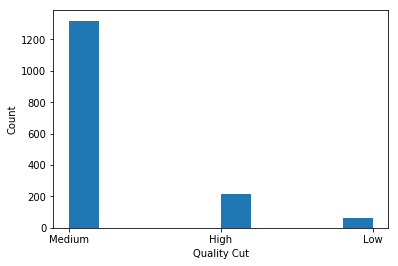

In [12]:
wine_target_cut = list(map(lambda x: 'Medium' if x>=5 and x<=6 else ('Low' if x<5 else 'High'),wine_target))
plt.hist(wine_target_cut)
plt.xlabel('Quality Cut')
plt.ylabel('Count')

In [13]:
X_train_orig, X_test_orig, y_train, y_test = train_test_split(wine_data, wine_target_cut, random_state=0)

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
pipe = make_pipeline(StandardScaler(), SVC())
param_grid = {'svc__C': [1, 2, 3, 4, 5], 'svc__gamma': [0.1, 0.2, 0.3, 0.4, 0.5]}
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train_orig, y_train)
print("Best cross-validation accuracy:", grid.best_score_)
print("Training set score:            ", grid.score(X_train_orig, y_train))
print("Test set score:                ", grid.score(X_test_orig, y_test))
print("Best parameters:               ", grid.best_params_)

Best cross-validation accuracy: 0.8523769808173478
Training set score:             0.9374478732276897
Test set score:                 0.8775
Best parameters:                {'svc__C': 2, 'svc__gamma': 0.3}


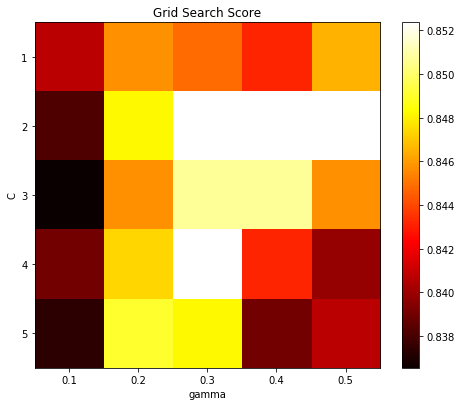

In [17]:
scores = grid.cv_results_['mean_test_score'].reshape(5,5)
plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(5), [0.1, 0.2, 0.3, 0.4, 0.5])
plt.yticks(np.arange(5), [1, 2, 3, 4, 5])
plt.title('Grid Search Score')
plt.show()

As seen our model's performance has increased to an acceptable measure